In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:


def plot_histogram(image, title, color=('b', 'g', 'r')):
    plt.figure(figsize=(10, 4))
    if len(image.shape) == 2:  # Grayscale
        hist = cv2.calcHist([image], [0], None, [256], [0, 256])
        plt.plot(hist, color='k')
    else:  # Color image
        for i, col in enumerate(color):
            hist = cv2.calcHist([image], [i], None, [256], [0, 256])
            plt.plot(hist, color=col)
    plt.title(title)
    plt.xlabel("Pixel Intensity")
    plt.ylabel("Frequency")
    plt.show()

def histogram_analysis(image_path):
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    plot_histogram(image, "Histogram of Color Image")
    plot_histogram(gray, "Histogram of Grayscale Image", color=['k'])

    # Histogram Equalization
    equalized = cv2.equalizeHist(gray)
    plot_histogram(equalized, "Histogram of Equalized Grayscale Image", color=['k'])

    # Show images
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 3, 1), plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)), plt.title("Original Image")
    plt.subplot(1, 3, 2), plt.imshow(gray, cmap='gray'), plt.title("Grayscale Image")
    plt.subplot(1, 3, 3), plt.imshow(equalized, cmap='gray'), plt.title("Equalized Image")
    plt.show()

def fourier_transform(image_path):
    image = cv2.imread(image_path, 0)
    dft = np.fft.fft2(image)
    dft_shift = np.fft.fftshift(dft)
    magnitude_spectrum = 20 * np.log(np.abs(dft_shift))

    # Inverse Fourier Transform
    idft_shift = np.fft.ifftshift(dft_shift)
    reconstructed = np.fft.ifft2(idft_shift).real

    # Visualization
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 3, 1), plt.imshow(image, cmap='gray'), plt.title("Original Image")
    plt.subplot(1, 3, 2), plt.imshow(magnitude_spectrum, cmap='gray'), plt.title("Magnitude Spectrum")
    plt.subplot(1, 3, 3), plt.imshow(reconstructed, cmap='gray'), plt.title("Reconstructed Image")
    plt.show()

def verify_rotation_property(image_path, angle=45):
    image = cv2.imread(image_path, 0)
    h, w = image.shape[:2]
    matrix = cv2.getRotationMatrix2D((w//2, h//2), angle, 1)
    rotated_image = cv2.warpAffine(image, matrix, (w, h))

    # Compute FFTs
    dft_original = np.fft.fftshift(np.fft.fft2(image))
    dft_rotated = np.fft.fftshift(np.fft.fft2(rotated_image))

    magnitude_original = 20 * np.log(np.abs(dft_original))
    magnitude_rotated = 20 * np.log(np.abs(dft_rotated))

    # Visualization
    plt.figure(figsize=(12, 6))
    plt.subplot(2, 2, 1), plt.imshow(image, cmap='gray'), plt.title("Original Image")
    plt.subplot(2, 2, 2), plt.imshow(rotated_image, cmap='gray'), plt.title(f"Rotated Image ({angle}°)")
    plt.subplot(2, 2, 3), plt.imshow(magnitude_original, cmap='gray'), plt.title("Original Spectrum")
    plt.subplot(2, 2, 4), plt.imshow(magnitude_rotated, cmap='gray'), plt.title(f"Rotated Spectrum ({angle}°)")
    plt.show()


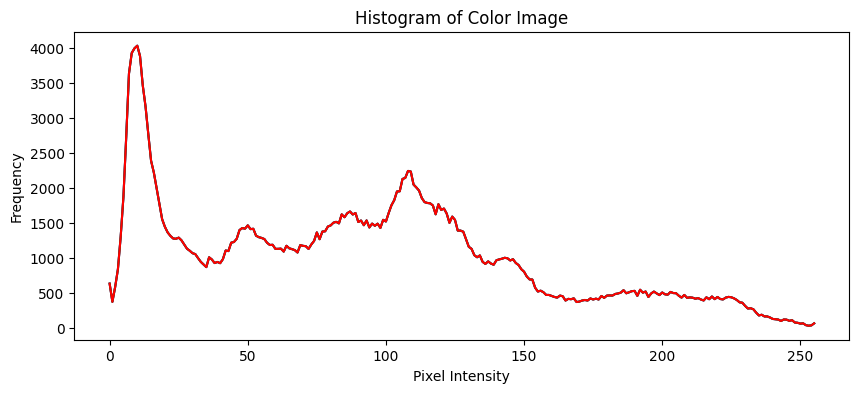

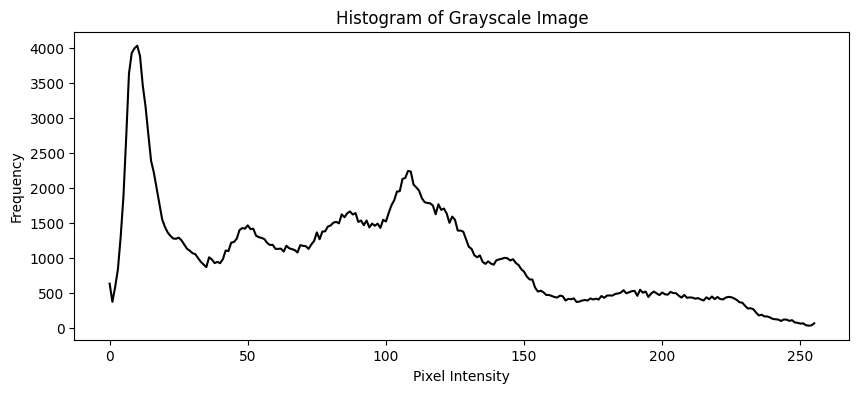

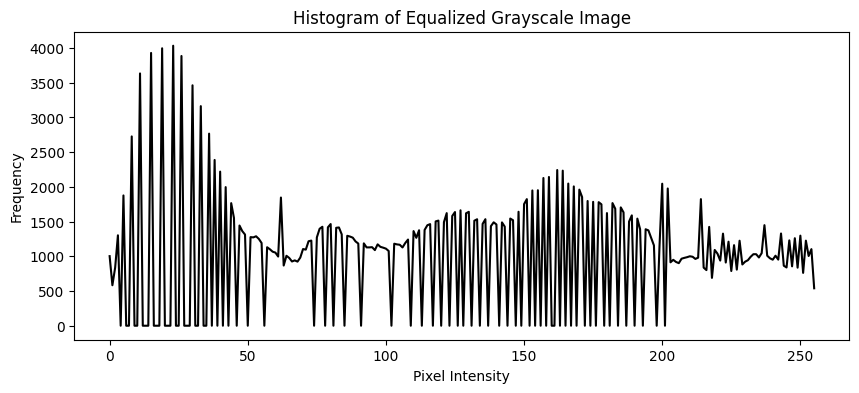

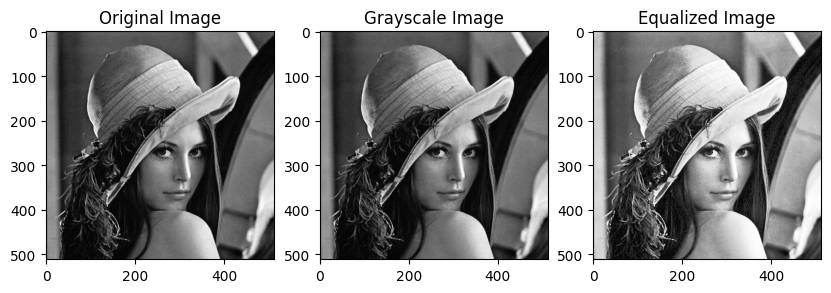

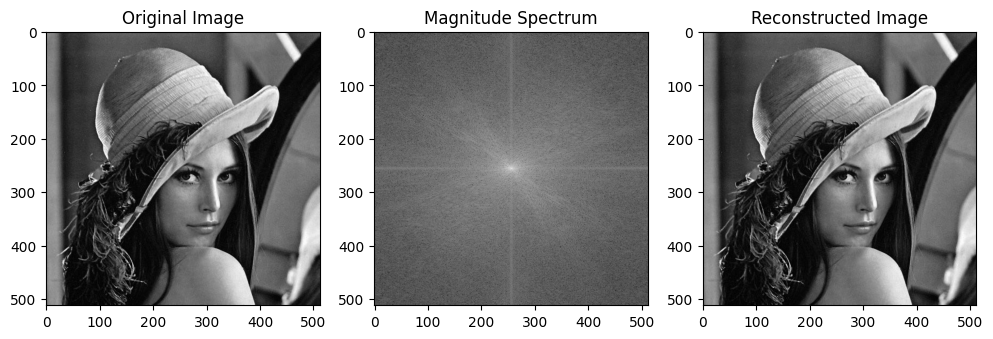

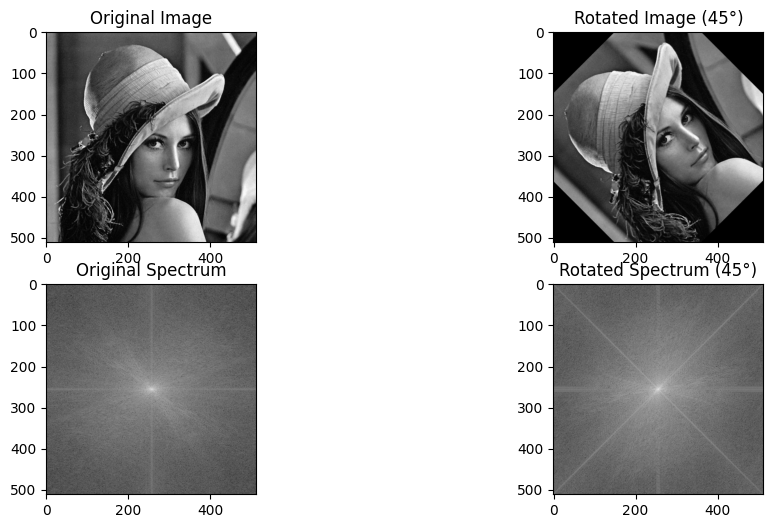

In [3]:

# Run the tasks with an example image
image_path = 'sampleimage.png'  # Change this to your image file
histogram_analysis(image_path)
fourier_transform(image_path)
verify_rotation_property(image_path, 45)


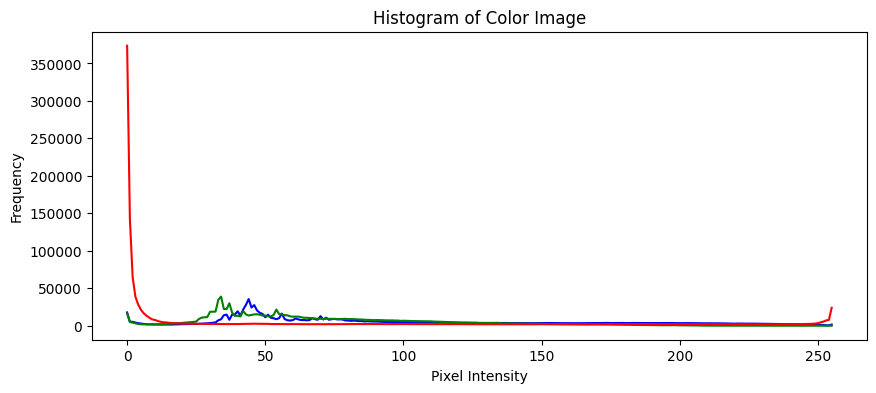

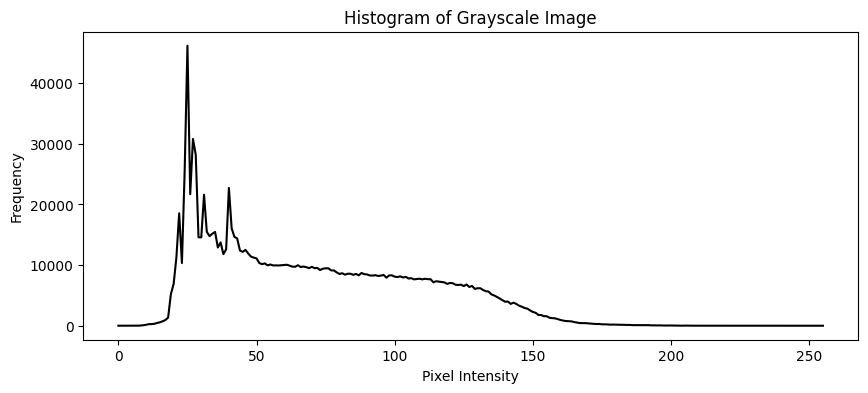

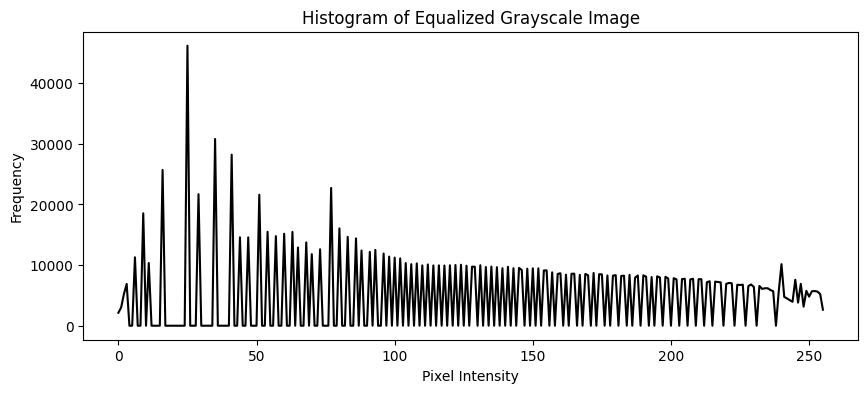

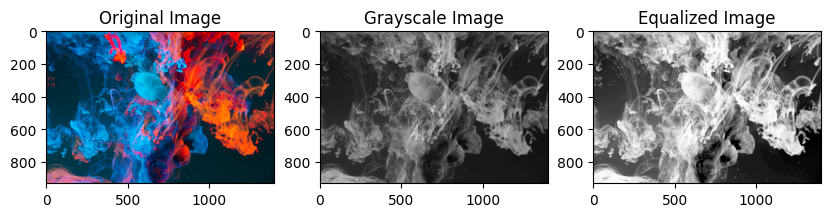

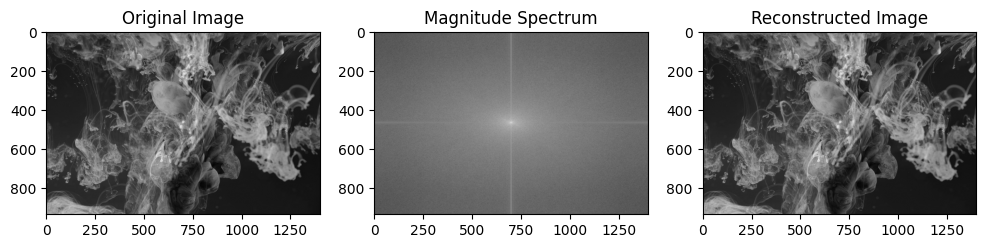

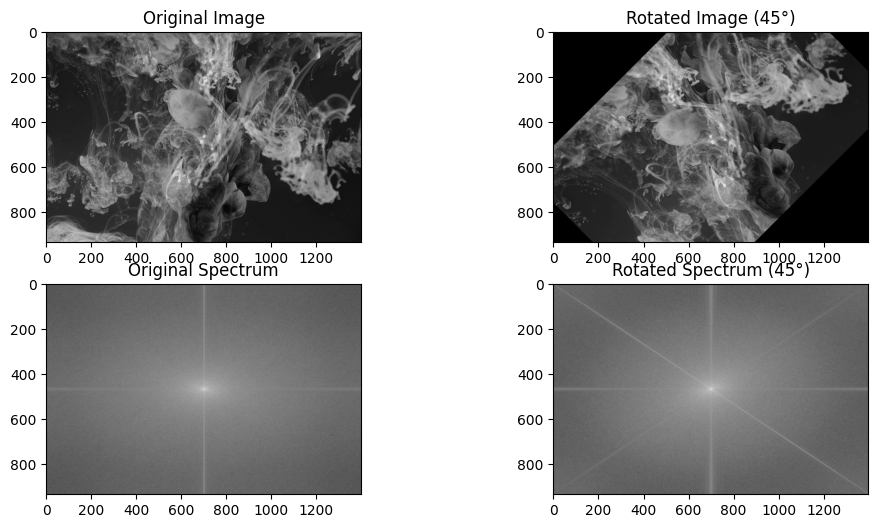

In [4]:

# Run the tasks with an example image
image_path = 'sampleimage2.jpg'  # Change this to your image file
histogram_analysis(image_path)
fourier_transform(image_path)
verify_rotation_property(image_path, 45)
